<a href="https://colab.research.google.com/github/LeanTavares/DataAnalytics/blob/main/Wallmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Projeto Wallmart***

# Perguntas importantes a serem respondidas

1. Qual o preço médio de venda semanal por loja?
2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas? (E que faça sentido)
3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?
4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.
5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

# Library

In [1]:
#Importanção de bibliotecas
import numpy as np
from datetime import date,datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise Introdutória

In [60]:
#Importando dataframe e já tratando datas e stores
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Walmart.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df_sorted  = df.sort_values(['Store', 'Date']).reset_index(drop=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [38]:
#Verificar integridade do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [39]:
#Verificando correlaçòes Acimas de 0,7 já é forte
df.corr()

<ipython-input-39-0c7015bb471c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


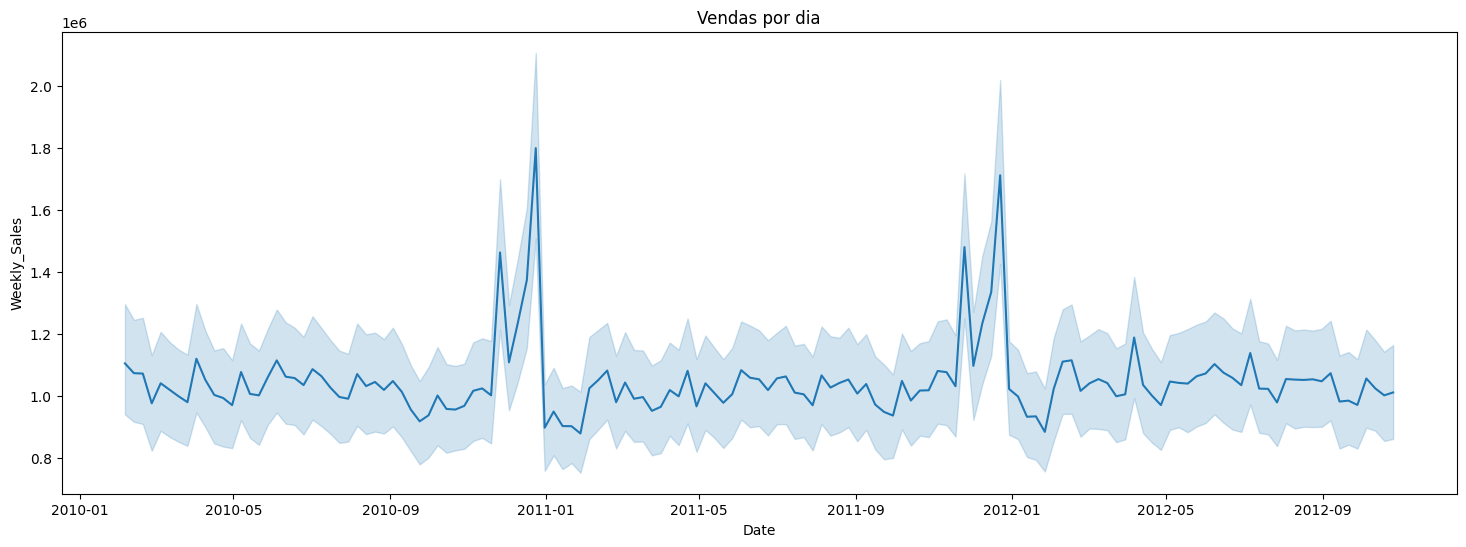

In [41]:
# Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média entre departamentos e lojas)
plt.figure(figsize=(18,6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data=df, x="Date", y="Weekly_Sales")
plt.title('Vendas por dia')
plt.show()

In [42]:
#Análise estatística simplificada
df.describe(percentiles=[0.95,0.99,0.995])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
95%,43.000000,2.049179e+06,1.000000,87.663000,4.029000,221.926729,12.187000
99%,45.000000,2.404035e+06,1.000000,93.190000,4.203000,225.470151,14.180000
99.5%,45.000000,2.733138e+06,1.000000,95.610000,4.286980,225.961002,14.313000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<Axes: xlabel='Weekly_Sales', ylabel='Count'>

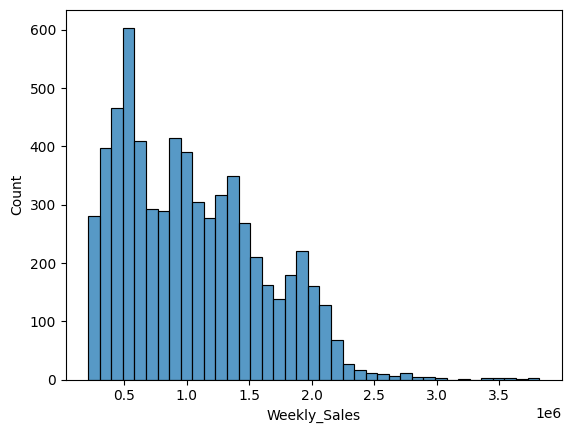

In [43]:
#As vendas semanais estão normalmente entre 0.5 e 1.5 milhõs de dolares
sns.histplot(data=df, x='Weekly_Sales')

In [40]:
#avaliando correlaçao coluna de vendas semanais
abs(df.corr()['Weekly_Sales']).sort_values(ascending=False)

<ipython-input-40-841277a654b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['Weekly_Sales']).sort_values(ascending=False)


Weekly_Sales    1.000000
Store           0.335332
Unemployment    0.106176
CPI             0.072634
Temperature     0.063810
Holiday_Flag    0.036891
Fuel_Price      0.009464
Name: Weekly_Sales, dtype: float64

In [9]:
#verificando consistencia
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

# Perguntas Importantes

## 1. Qual preço médio de venda semanal por loja?

In [44]:
#Agrupar por loja
df_group = df.groupby('Store',as_index=False).mean()
df_group.sort_values('Weekly_Sales',ascending=False)
df_group.head()

<ipython-input-44-dd3589a3ae84>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df.groupby('Store',as_index=False).mean()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
1,2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
2,3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986
3,4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
4,5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406


In [45]:
#Selecionar os 5 com maior Média
top5 = df_group.sort_values('Weekly_Sales',ascending=False).Store.to_list()[:5]
top5

[20, 4, 14, 13, 2]

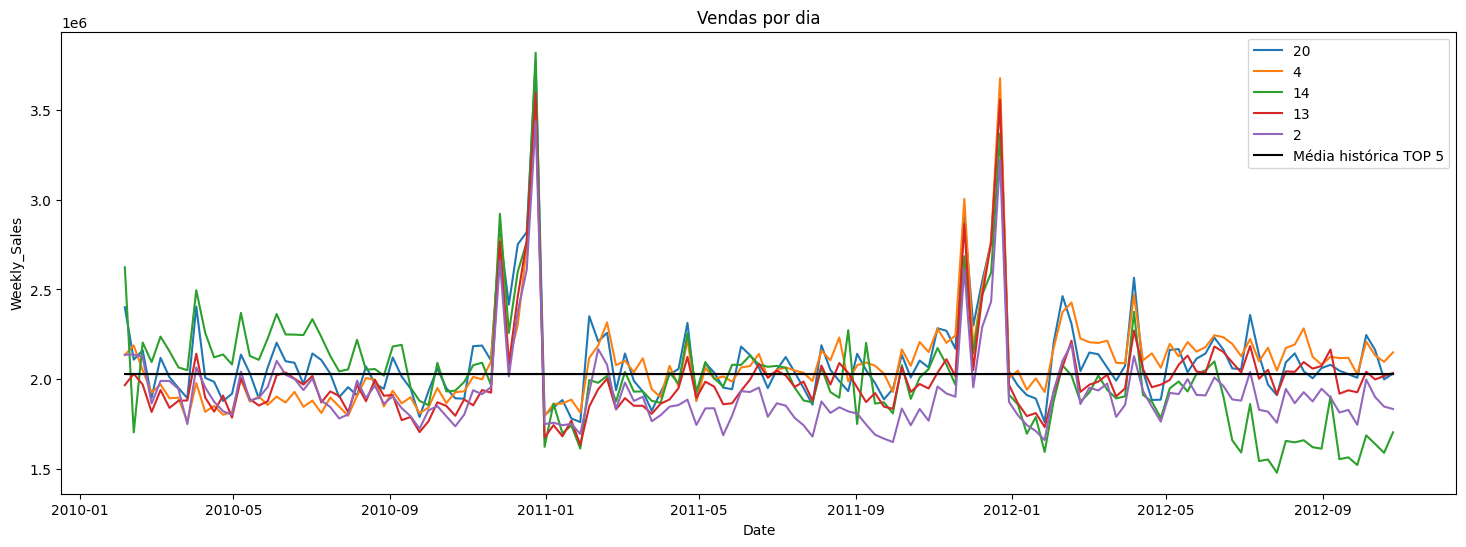

In [46]:
#Plotando uma relação de Tempo X Venda dos Top 5 acima
plt.figure(figsize=(18,6))
for i in top5:
  sns.lineplot(data=df[df.Store == i], x="Date", y="Weekly_Sales",label=i)


sns.lineplot(data=df, x="Date", y=df[df.Store.isin([20, 4, 14, 13, 2])].Weekly_Sales.mean(),label='Média histórica TOP 5',c='black')


plt.title('Vendas por dia')
plt.show()

## 2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas?

<ipython-input-47-77325683129d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['Weekly_Sales'].sort_values())
<ipython-input-47-77325683129d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Fuel_Price      0.009464
Holiday_Flag    0.036891
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64


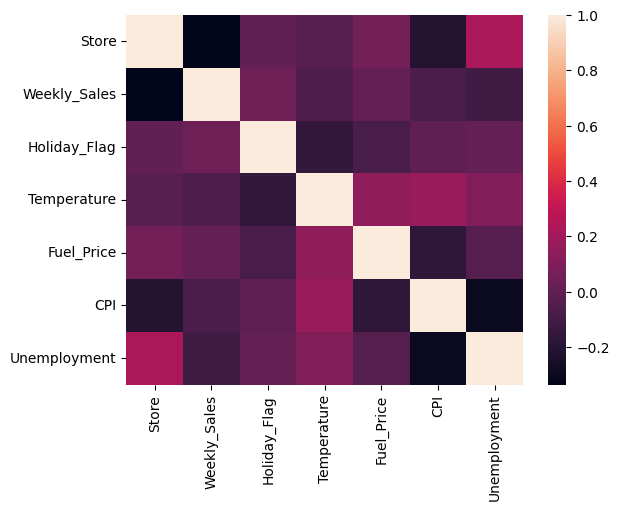

In [47]:
print(df.corr()['Weekly_Sales'].sort_values())
# Resp: Unemployment com um corr de -0.106. O Store não é parâmetro pois
# ele representa o ID da loja e não necessariamente o tamanho ou poder de venda
sns.heatmap(df.corr())
plt.show()

## 3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

In [48]:
#Acumulado
df_acul = df.groupby('Store',as_index=False).sum().sort_values('Weekly_Sales',ascending=False).iloc[0,:]
top_store = df_acul['Store']
top_store

<ipython-input-48-a67ae370bcf7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_acul = df.groupby('Store',as_index=False).sum().sort_values('Weekly_Sales',ascending=False).iloc[0,:]


20.0

In [49]:
#Selecionanto apenas os dados da loja com maior venda (Store 20)
df_top_store = df[df.Store == top_store]
top_mean = df_top_store['Weekly_Sales'].mean()
df_top_store_overmean = df_top_store[df_top_store.Weekly_Sales >= top_mean]
df_top_store_overmean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187
2725,20,2010-04-02,2405395.22,0,51.00,2.850,204.025284,7.856


In [50]:
#Imprimindo respostas
print('Semanas totais:',df_top_store.shape[0])
print('Semanas acima da média:',df_top_store_overmean.shape[0])
print(r'{}% das semanas acima da média'.format(round(df_top_store_overmean.shape[0]*100/df_top_store.shape[0],2)))

Semanas totais: 143
Semanas acima da média: 52
36.36% das semanas acima da média


## 4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

In [52]:
#Dicionário de feriados
holiday_dict = { #Format: %d/%m/%y
'Super Bowl':	['12/02/10', '11/02/11', '10/02/12'],
'Labour Day':	['10/09/10', '09/09/11', '07/09/12'],
'Thanksgiving':	['26/09/10', '25/09/11', '23/09/12'],
'Christmas':	['31/12/10', '30/12/11', '28/12/12']
}

In [53]:
# Demonstrativo de como acessar os dados no dict
for i in holiday_dict.keys():
  print(i)
  for k in holiday_dict[i]:
    print(k)

Super Bowl
12/02/10
11/02/11
10/02/12
Labour Day
10/09/10
09/09/11
07/09/12
Thanksgiving
26/09/10
25/09/11
23/09/12
Christmas
31/12/10
30/12/11
28/12/12


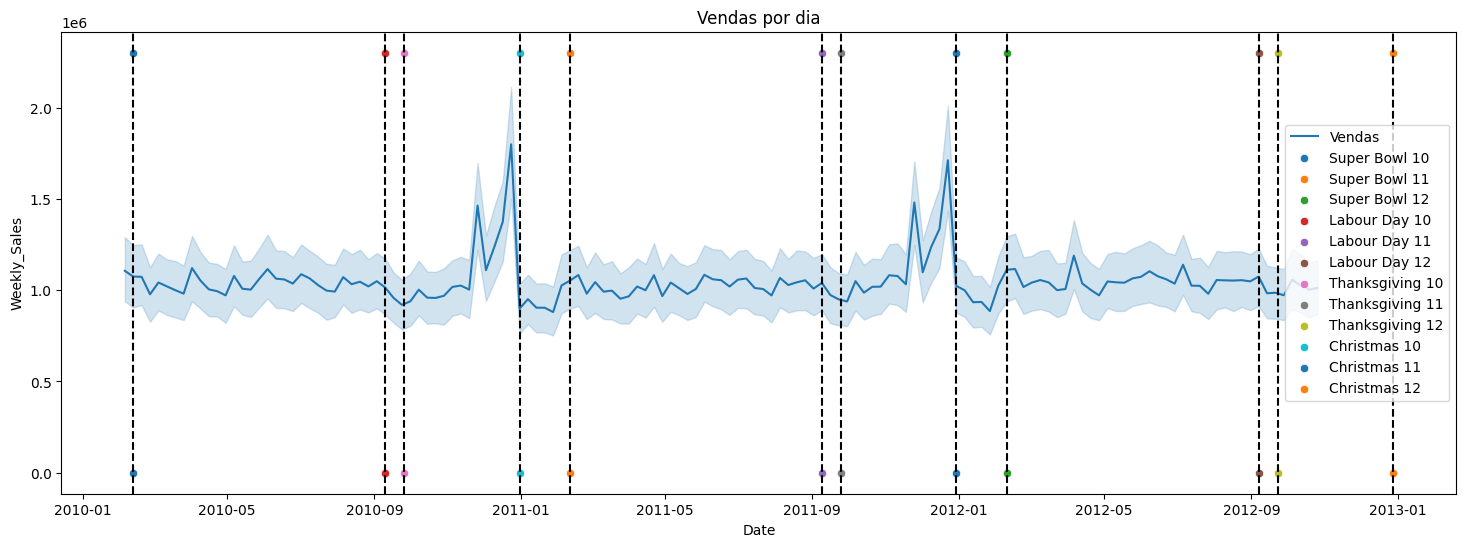

In [54]:
#Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média)

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x="Date", y="Weekly_Sales", label='Vendas', markers=True, dashes=False)

for i in holiday_dict.keys():
  #print(i)
  for k in holiday_dict[i]:
    #print(k)
    sns.scatterplot(x=[datetime.strptime(k,'%d/%m/%y'),datetime.strptime(k,'%d/%m/%y')],y=[0,2.3*10**6],label=str(i)+ ' ' + k[-2:])
    plt.axvline(datetime.strptime(k,'%d/%m/%y'),0,2.3*10**6,color='black',linestyle='--')

plt.title('Vendas por dia')
plt.show()

## 5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

Como fator de escolha para a pergunta acima, vou escolher a loja que teve um maior rendimento histórico. Ou seja, vou escolher aquela que teve mais semanas com vendas acima da média histórica.

In [55]:
#Agrupando lojas e suas medias de vendas semanais
df_mean = df.groupby('Store',as_index=False).mean()
df_mean = df_mean[['Store','Weekly_Sales']]
df_mean

<ipython-input-55-5eb3c1ffb8e5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Store',as_index=False).mean()


,Store,Weekly_Sales
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05
5,6,1.564728e+06
6,7,5.706173e+05
7,8,9.087495e+05
8,9,5.439806e+05
9,10,1.899425e+06


In [56]:
#lógica para rankear lojas que tiveram vendas semanais acima da média
lista_aux = []
lista_aux1 = []
for i in df_mean.Store:
  lista_aux.append(df[df.Store == i].shape[0])
  lista_aux1.append(df[(df.Store == i) & (df.Weekly_Sales >= df_mean.iloc[i-1,1])].shape[0])

In [57]:
#Criando colunas Total, Bateu, Perc
df_mean['Total'] = lista_aux
df_mean['Bateu'] = lista_aux1
df_mean['Perc'] = df_mean['Bateu']/df_mean['Total']*100
df_mean.head()

,Store,Weekly_Sales,Total,Bateu,Perc
0,1,1.555264e+06,143,56,39.160839
1,2,1.925751e+06,143,53,37.062937
2,3,4.027044e+05,143,64,44.755245
3,4,2.094713e+06,143,62,43.356643
4,5,3.180118e+05,143,56,39.160839


In [58]:
#Lista decrescente das lojas que mais tiveram semanas com vendas acima da média
#Loja escolhida foi a loja 43
df_mean.sort_values('Perc',ascending=False).head()

,Store,Weekly_Sales,Total,Bateu,Perc
42,43,633324.723147,143,73,51.048951
41,42,556403.863147,143,71,49.650350
35,36,373511.992797,143,71,49.650350
36,37,518900.281958,143,69,48.251748
37,38,385731.653287,143,68,47.552448


# Outras análises pertinentes

In [11]:
#verificando correlacoes por loja
#test_shift faz a correlacao com linha anterior
df_list = []
corr_list = []
for i in df.Store.unique():
  df_copy = df.copy()
  df_copy = df_copy[df_copy.Store == i].reset_index(drop=True)
  df_copy['Teste_shif'] = df_copy['Weekly_Sales'].shift(1)
  #df_copy['Temp_corr'] = df_copy.corr()['Weekly_Sales']['Temperature']
  corr_list.append( df_copy.corr()['Weekly_Sales'] )
  df_list.append( df_copy )

<ipython-input-11-757363bc39bd>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy['Temp_corr'] = df_copy.corr()['Weekly_Sales']['Temperature']
<ipython-input-11-757363bc39bd>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_list.append( df_copy.corr()['Weekly_Sales'] )
<ipython-input-11-757363bc39bd>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy['Temp_corr'] = df_copy.corr()['Weekly_Sales']['Temperature']
<ipython-input-11-757363bc39bd>:9: FutureWarning:

In [12]:
#lendo loja na posicao 0 da lista criada
df_list[0].corr()['Weekly_Sales']

<ipython-input-12-8b5aa0a3c53f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_list[0].corr()['Weekly_Sales']


Store                NaN
Weekly_Sales    1.000000
Holiday_Flag    0.194905
Temperature    -0.222701
Fuel_Price      0.124592
CPI             0.225408
Unemployment   -0.097955
Teste_shif      0.302158
Temp_corr            NaN
Name: Weekly_Sales, dtype: float64

In [13]:
df_copy.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Teste_shif,Temp_corr
0,45,2010-02-05,890689.51,0,27.31,2.784,181.871190,8.992,NaN,-0.201945
1,45,2010-02-12,656988.64,1,27.73,2.773,181.982317,8.992,890689.51,-0.201945
2,45,2010-02-19,841264.04,0,31.27,2.745,182.034782,8.992,656988.64,-0.201945
3,45,2010-02-26,741891.65,0,34.89,2.754,182.077469,8.992,841264.04,-0.201945
4,45,2010-03-05,777951.22,0,37.13,2.777,182.120157,8.992,741891.65,-0.201945


In [14]:
#agrupando por semana
teste = df.groupby(['Date', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']).agg({'Store': 'nunique'}).sort_values( ['Store','Date'] ,ascending=False)
teste[teste.Store == 3]

Store
Date       Temperature Fuel_Price CPI        Unemployment       
2012-10-26 65.95       4.301      131.193097 10.199            3
           70.50       3.506      223.078337 6.170             3
2012-10-19 68.52       3.594      223.059808 6.170             3
           68.66       4.449      131.149968 10.199            3
2012-10-12 61.53       3.601      223.015426 6.170             3
...                                                          ...
2010-02-19 54.83       2.915      126.526286 13.975            3
2010-02-12 37.77       2.548      210.897994 8.324             3
           47.87       2.946      126.496258 13.975            3
2010-02-05 39.05       2.572      210.752605 8.324             3
           49.47       2.962      126.442065 13.975            3

[286 rows x 1 columns]

In [15]:
#filtro semelhante ao o where do sql
df[ (df.Temperature == 68.52) & (df.Fuel_Price == 3.594)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3001,21,2012-10-19,641368.14,0,68.52,3.594,223.059808,6.17
4288,30,2012-10-19,437537.29,0,68.52,3.594,223.059808,6.17
4431,31,2012-10-19,1378730.45,0,68.52,3.594,223.059808,6.17


In [19]:
#selecionando loja aleatoria
df1 = df[df.Store == 29]
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4004,29,2010-02-05,538634.46,0,24.36,2.788,131.527903,10.064
4005,29,2010-02-12,529672.95,1,28.14,2.771,131.586613,10.064
4006,29,2010-02-19,542399.07,0,31.96,2.747,131.637000,10.064
4007,29,2010-02-26,488417.61,0,35.98,2.753,131.686000,10.064
4008,29,2010-03-05,535087.91,0,36.82,2.766,131.735000,10.064


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

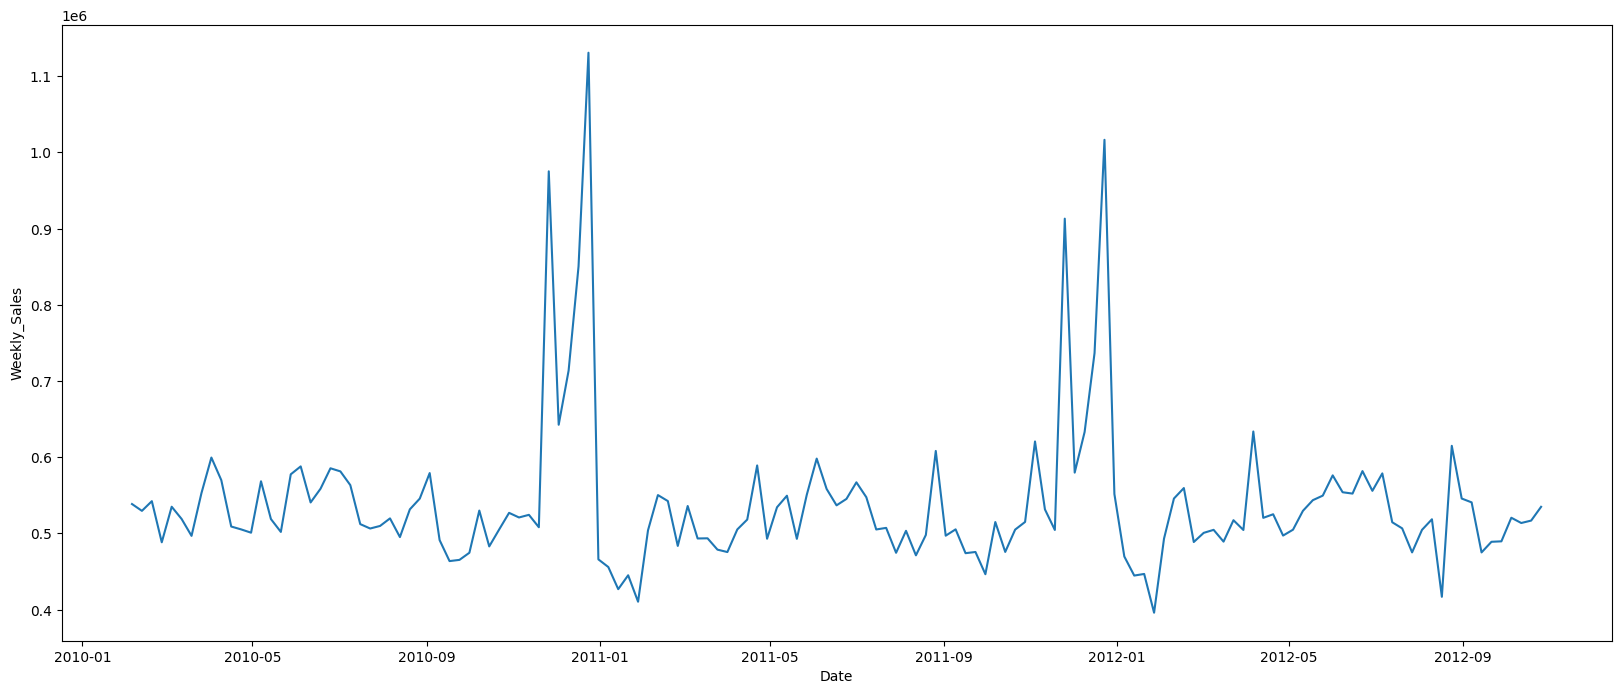

In [17]:
#analise semanal de vendas
plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')

<ipython-input-20-e176aae74174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Moving_avg'] = df['Weekly_Sales'].rolling(window=3).mean()


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

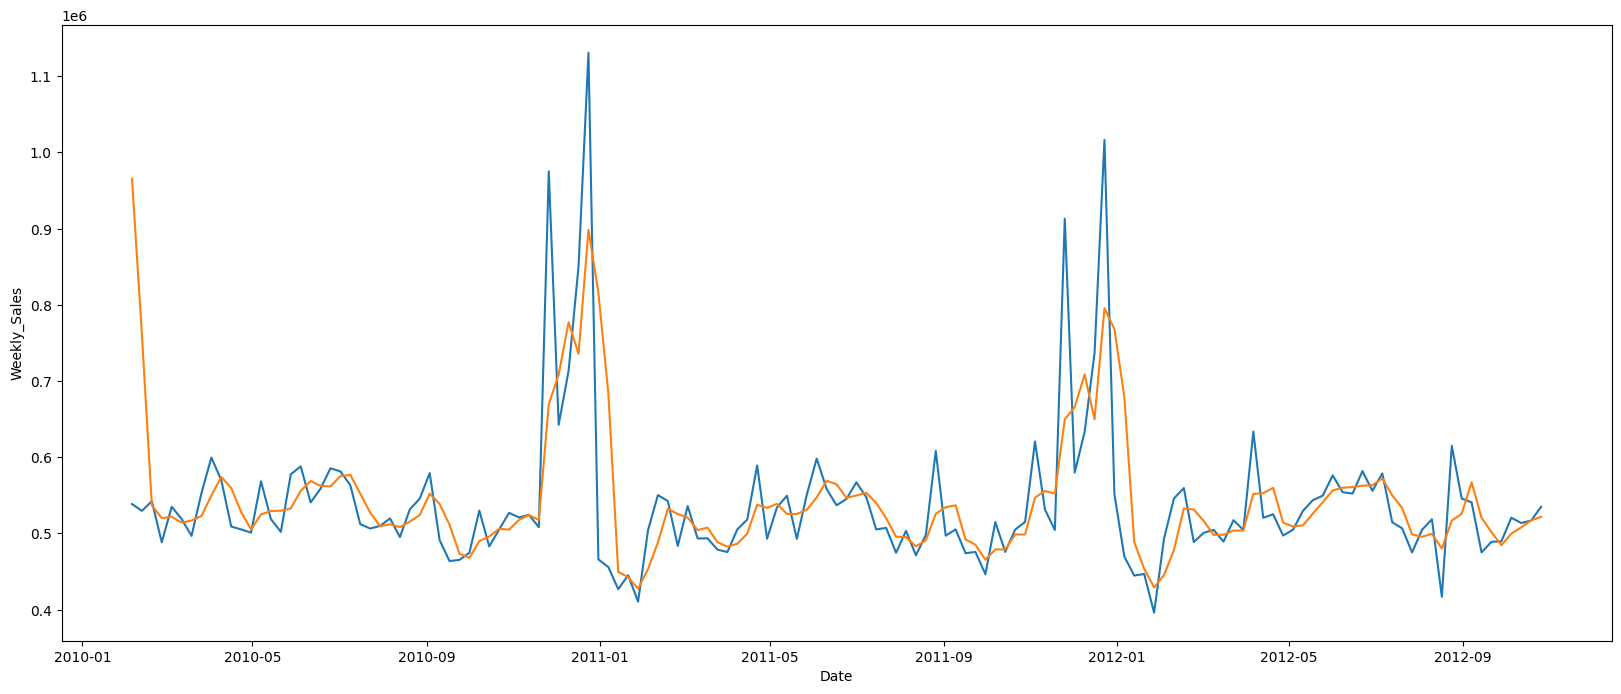

In [20]:
#gerando media movel p/ suavizar picos e vales (outliers)
df1['Moving_avg'] = df['Weekly_Sales'].rolling(window=3).mean()

plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')
sns.lineplot(data=df1,x='Date',y='Moving_avg')

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

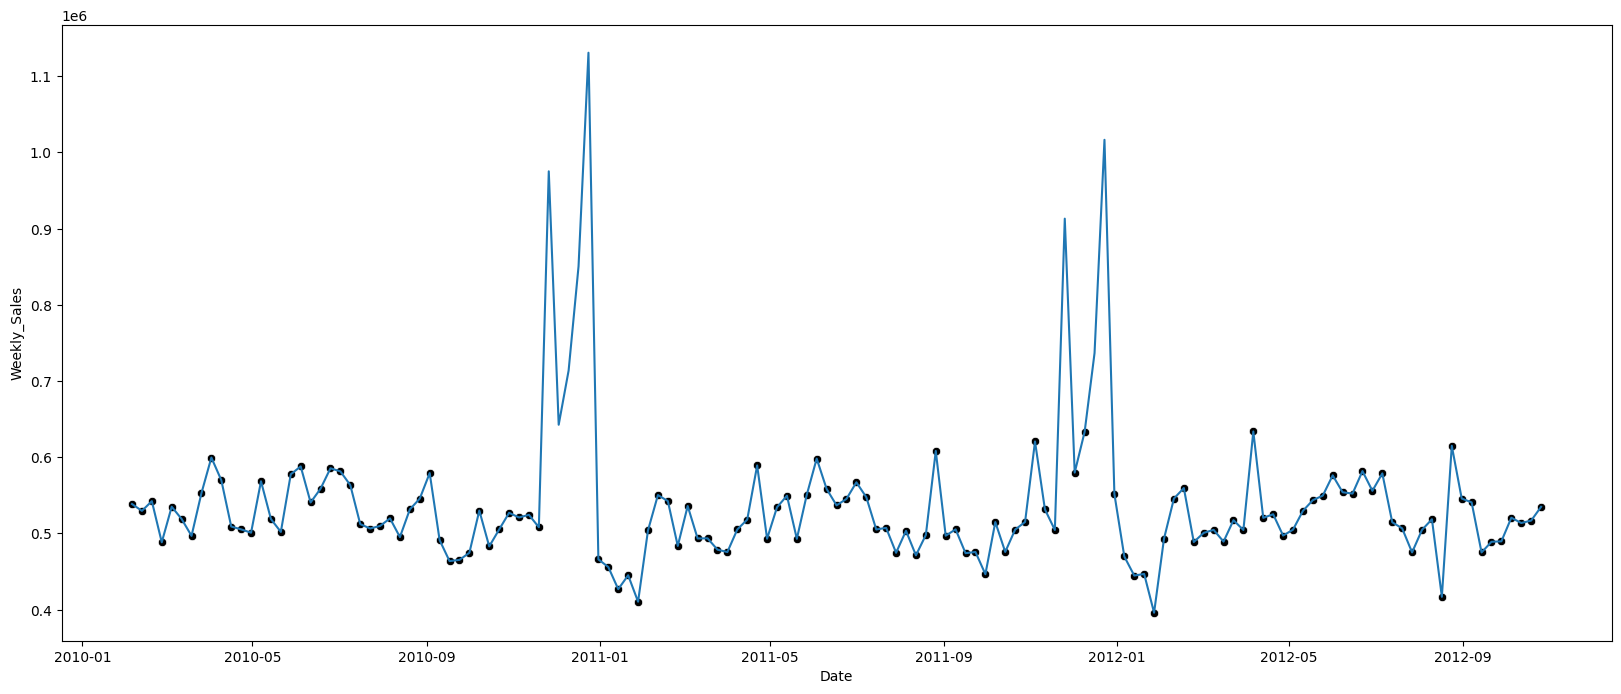

In [21]:
#plotando grafico com percentil 95% para definir reais outlier
lim_cut = df1.describe(percentiles=[0.8,0.9,0.95,0.99])['Weekly_Sales']['95%']
df1_clean = df1[df1.Weekly_Sales <= lim_cut]

plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')
sns.scatterplot(data=df1_clean,x='Date',y='Weekly_Sales',color='k')

In [30]:
#dividindo max de vendas semanais por venda semanal da loja
df1_clean['Sales_N'] = df1_clean['Weekly_Sales']/df1_clean['Weekly_Sales'].max()
df1_clean.head()

<ipython-input-30-26e3127ed765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['Sales_N'] = df1_clean['Weekly_Sales']/df1_clean['Weekly_Sales'].max()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg,Sales_N
4004,29,2010-02-05,538634.46,0,24.36,2.788,131.527903,10.064,965406.516667,0.849814
4005,29,2010-02-12,529672.95,1,28.14,2.771,131.586613,10.064,760722.673333,0.835675
4006,29,2010-02-19,542399.07,0,31.96,2.747,131.637000,10.064,536902.160000,0.855753
4007,29,2010-02-26,488417.61,0,35.98,2.753,131.686000,10.064,520163.210000,0.770586
4008,29,2010-03-05,535087.91,0,36.82,2.766,131.735000,10.064,521968.196667,0.844218


<Axes: xlabel='Date', ylabel='Sales_N'>

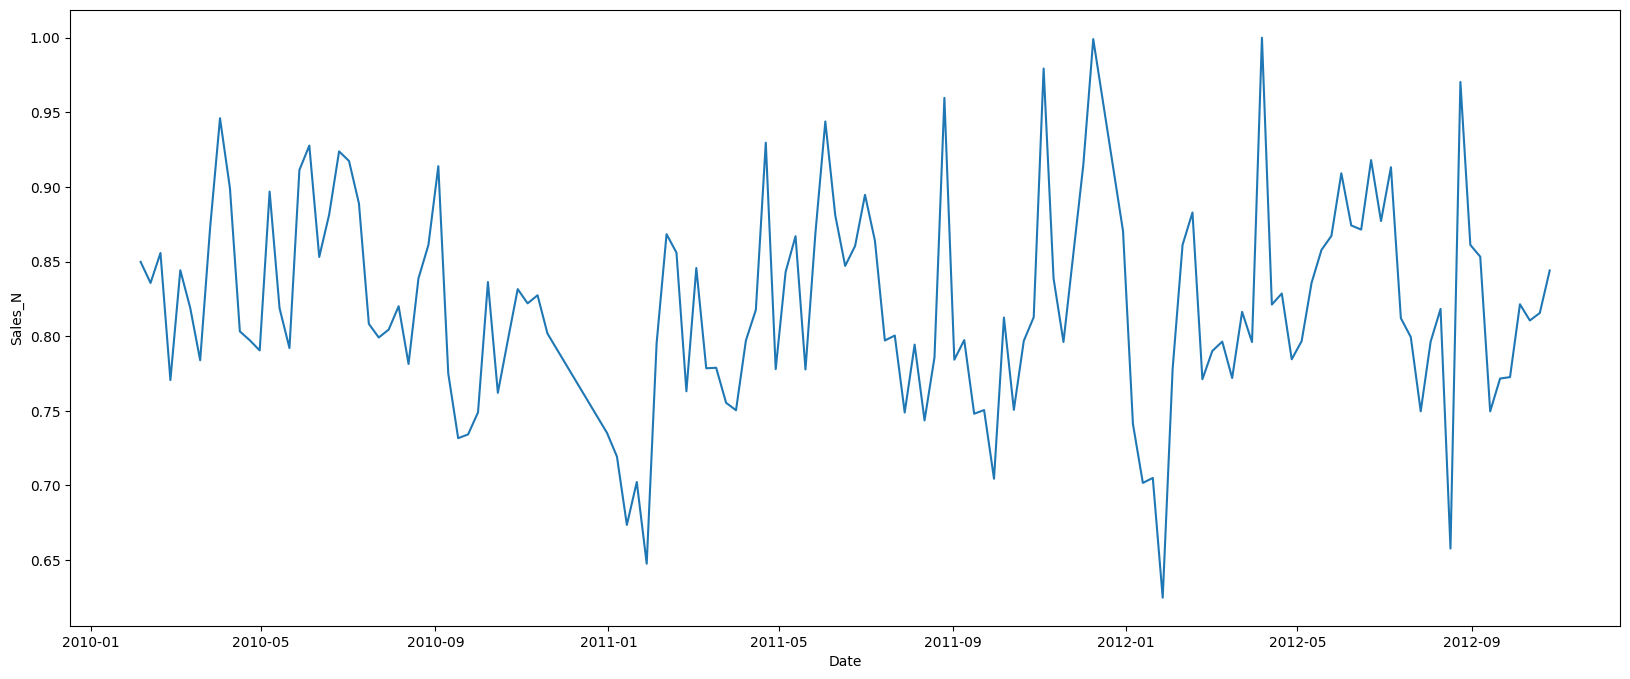

In [32]:
#dividindo max de vendas semanais por venda semanal da loja (grafico)
plt.figure(figsize=(20,8))
sns.lineplot(data=df1_clean,x='Date',y='Sales_N')

In [26]:
#acumulado de vendas
df1['Acum_sales'] = df1['Weekly_Sales'].cumsum()
df1.head()

<ipython-input-26-1d0f4a65413e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Acum_sales'] = df1['Weekly_Sales'].cumsum()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg,Sales_N,Acum_sales
4004,29,2010-02-05,538634.46,0,24.36,2.788,131.527903,10.064,965406.516667,0.849814,538634.46
4005,29,2010-02-12,529672.95,1,28.14,2.771,131.586613,10.064,760722.673333,0.835675,1068307.41
4006,29,2010-02-19,542399.07,0,31.96,2.747,131.637000,10.064,536902.160000,0.855753,1610706.48
4007,29,2010-02-26,488417.61,0,35.98,2.753,131.686000,10.064,520163.210000,0.770586,2099124.09
4008,29,2010-03-05,535087.91,0,36.82,2.766,131.735000,10.064,521968.196667,0.844218,2634212.00


In [29]:
#diferenca percentual de vendas de uma semana com a semana anterior
df1['Dif_relative'] = (df1['Weekly_Sales'].shift(1) - df1['Weekly_Sales'])/df1['Weekly_Sales'].shift(1)*-100
df1

<ipython-input-29-f75842cd459e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dif_relative'] = (df1['Weekly_Sales'].shift(1) - df1['Weekly_Sales'])/df1['Weekly_Sales'].shift(1)*-100


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg,Sales_N,Acum_sales,Acum_sales_perc,Dif_relative
4004,29,2010-02-05,538634.46,0,24.36,2.788,131.527903,10.064,965406.516667,0.849814,538634.46,0.006982,NaN
4005,29,2010-02-12,529672.95,1,28.14,2.771,131.586613,10.064,760722.673333,0.835675,1068307.41,0.013849,-1.663746
4006,29,2010-02-19,542399.07,0,31.96,2.747,131.637000,10.064,536902.160000,0.855753,1610706.48,0.020880,2.402637
4007,29,2010-02-26,488417.61,0,35.98,2.753,131.686000,10.064,520163.210000,0.770586,2099124.09,0.027211,-9.952351
4008,29,2010-03-05,535087.91,0,36.82,2.766,131.735000,10.064,521968.196667,0.844218,2634212.00,0.034148,9.555409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,29,2012-09-28,489674.23,0,62.17,4.018,138.739500,9.419,484626.880000,0.772568,75055304.59,0.972956,0.121657
4143,29,2012-10-05,520632.80,0,62.09,4.027,138.825600,9.151,499795.420000,0.821412,75575937.39,0.979705,6.322279
4144,29,2012-10-12,513737.00,0,54.18,4.029,138.911700,9.151,508014.676667,0.810532,76089674.39,0.986364,-1.324504
4145,29,2012-10-19,516909.24,0,55.28,4.000,138.833613,9.151,517093.013333,0.815537,76606583.63,0.993065,0.617483
